# Data analysis of stale bot

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import yaml

%matplotlib inline

### Importing dataset from csv

In [13]:
df = pd.read_csv("data/project_bot.csv", sep=";") 

In [14]:
df

,project_name,change_type,in_main_branch,commit_hash,commit_msg,commit_author,committer,is_merge,commit_date,source_code,diff,num_added,num_removed,owner,repo
0,xWordPress,ADD,True,e2cd53cc3f623b3f58496b468e3b551eac7d5694,Activate the GitHub App Stale on the GitHub re...,Johan Ljunggren,GitHub,False,2018-08-14 14:12:58,# Configuration for probot-stale - https://git...,"@@ -0,0 +1,44 @@\n+# Configuration for probot-...",44,0,PowerShell,PowerShell/xWordPress
1,splat,ADD,True,d3efc8ce6cdd411b2a1a2655b5e07df743599ecc,housekeeping: automatically close stale issues...,Geoffrey Huntley,GitHub,False,2017-09-11 22:07:54,# Number of days of inactivity before an issue...,"@@ -0,0 +1,26 @@\n+# Number of days of inactiv...",26,0,paulcbetts,paulcbetts/splat
2,splat,ADD,True,83915d313348f7bb8102c8c2bbebcd6d608a2d19,Merge pull request #173 from reactiveui/develo...,Geoffrey Huntley,GitHub,True,2018-03-12 15:13:28,# Number of days of inactivity before an issue...,"@@ -0,0 +1,26 @@\n+# Number of days of inactiv...",26,0,paulcbetts,paulcbetts/splat
3,shibboleth-fastcgi,ADD,True,82df86ef4b986692766b18b86d8adc3def0393c0,Add stale configuration\n\nConfig for the GitH...,David Beitey,GitHub,False,2017-11-10 15:16:14,# Number of days of inactivity before an issue...,"@@ -0,0 +1,9 @@\n+# Number of days of inactivi...",9,0,nginx-shib,nginx-shib/shibboleth-fastcgi
4,shibboleth-fastcgi,ADD,True,f1ff3197d02e00caba3860b199a5bba65bce8e0d,Merge branch 'master' of github.com:nginx-shib...,David Beitey,David Beitey,True,2017-11-23 11:53:09,# Number of days of inactivity before an issue...,"@@ -0,0 +1,9 @@\n+# Number of days of inactivi...",9,0,nginx-shib,nginx-shib/shibboleth-fastcgi
5,khbrst.github.io,ADD,True,1a2a953dfb2139ed0c7c93a707114211af5671c7,Configure Probot: Stale,Michael Rose,Michael Rose,False,2017-09-12 09:41:26,# Number of days of inactivity before an issue...,"@@ -0,0 +1,17 @@\n+# Number of days of inactiv...",17,0,khbrst,khbrst/khbrst.github.io
6,khbrst.github.io,MODIFY,True,d67aa113c81284a21b752b32a0b43caa22cd3507,Update stale.yml,Michael Rose,GitHub,False,2017-09-12 10:35:25,# Number of days of inactivity before an issue...,"@@ -7,11 +7,11 @@ exemptLabels:\n - pinned\n...",2,2,khbrst,khbrst/khbrst.github.io
7,khbrst.github.io,MODIFY,True,6beaf7099c218ee32d7e35aa71451f27dff08f84,Update stale.yml,Michael Rose,GitHub,False,2017-09-12 15:23:13,# Number of days of inactivity before an issue...,"@@ -4,8 +4,7 @@ daysUntilStale: 30\n daysUntil...",1,2,khbrst,khbrst/khbrst.github.io
8,khbrst.github.io,MODIFY,True,37aad5d47608fad4f3be8cef57fc88de8f84d810,Merge branch 'master' of https://github.com/mm...,Michael Rose,Michael Rose,True,2017-09-12 15:36:49,# Number of days of inactivity before an issue...,"@@ -4,8 +4,7 @@ daysUntilStale: 30\n daysUntil...",1,2,khbrst,khbrst/khbrst.github.io
9,khbrst.github.io,MODIFY,True,ea6740a5da4edd63c84ad196d4fa3c49496c891f,Update stale bot message,Michael Rose,GitHub,False,2017-09-23 22:21:06,# Number of days of inactivity before an issue...,"@@ -10,7 +10,17 @@ staleLabel: 'Status: Stale'...",12,2,khbrst,khbrst/khbrst.github.io


### Filtering dataset

In [15]:
df_new = df[df.groupby('repo').commit_date.transform('max') == df['commit_date']]

In [16]:
df_new

,project_name,change_type,in_main_branch,commit_hash,commit_msg,commit_author,committer,is_merge,commit_date,source_code,diff,num_added,num_removed,owner,repo
0,xWordPress,ADD,True,e2cd53cc3f623b3f58496b468e3b551eac7d5694,Activate the GitHub App Stale on the GitHub re...,Johan Ljunggren,GitHub,False,2018-08-14 14:12:58,# Configuration for probot-stale - https://git...,"@@ -0,0 +1,44 @@\n+# Configuration for probot-...",44,0,PowerShell,PowerShell/xWordPress
2,splat,ADD,True,83915d313348f7bb8102c8c2bbebcd6d608a2d19,Merge pull request #173 from reactiveui/develo...,Geoffrey Huntley,GitHub,True,2018-03-12 15:13:28,# Number of days of inactivity before an issue...,"@@ -0,0 +1,26 @@\n+# Number of days of inactiv...",26,0,paulcbetts,paulcbetts/splat
4,shibboleth-fastcgi,ADD,True,f1ff3197d02e00caba3860b199a5bba65bce8e0d,Merge branch 'master' of github.com:nginx-shib...,David Beitey,David Beitey,True,2017-11-23 11:53:09,# Number of days of inactivity before an issue...,"@@ -0,0 +1,9 @@\n+# Number of days of inactivi...",9,0,nginx-shib,nginx-shib/shibboleth-fastcgi
20,khbrst.github.io,ADD,True,80ada74c0fc33a793543355e3b2264a79cd53995,Merge remote-tracking branch 'upstream/master',Yoon Youngho,Yoon Youngho,True,2018-11-14 00:05:48,# Number of days of inactivity before an issue...,"@@ -0,0 +1,21 @@\n+# Number of days of inactiv...",21,0,khbrst,khbrst/khbrst.github.io
21,arlo,ADD,True,9cb468e43c0dc0b992336822f7c661b3c8590d29,Add probot stale rules.,Jeff Walter,Jeff Walter,False,2018-10-10 02:03:23,# Configuration for probot-stale - https://git...,"@@ -0,0 +1,18 @@\n+# Configuration for probot-...",18,0,jeffreydwalter,jeffreydwalter/arlo
93,react-storybook,MODIFY,True,e9b39b2076d2e34dd7a32c33eaed341c2a890bfb,Merge branch 'master' into addon-jest-improvem...,Norbert de Langen,Norbert de Langen,True,2018-10-01 10:23:41,# Number of days of inactivity before an issue...,"@@ -10,6 +10,7 @@ exemptLabels:\n - 'do not ...",1,0,storybooks,storybooks/react-storybook
94,dspp-keras,ADD,True,4f8326ed9fa97f610c905070bc57362787ded36b,Add probot-stale support of dspp-keras repo,Kamil Tamiola,Kamil Tamiola,False,2017-06-29 21:22:34,# Number of days of inactivity before an issue...,"@@ -0,0 +1,17 @@\n+# Number of days of inactiv...",17,0,PeptoneInc,PeptoneInc/dspp-keras
95,xPowerShellExecutionPolicy,ADD,True,9caf0e242f27489bc57799121a3a989fc4d1d656,Activate the GitHub App Stale on the GitHub re...,Johan Ljunggren,GitHub,False,2018-06-18 10:56:00,# Configuration for probot-stale - https://git...,"@@ -0,0 +1,44 @@\n+# Configuration for probot-...",44,0,PowerShell,PowerShell/xPowerShellExecutionPolicy
97,bearded-avenger-deploymentkit,ADD,True,72ee9b78baf15b8d3381b8c3d39d85f73fd83b04,Merge branch 'master' of https://github.com/cs...,Wes Young,Wes Young,True,2018-03-30 11:24:59,# Number of days of inactivity before an issue...,"@@ -0,0 +1,17 @@\n+# Number of days of inactiv...",17,0,csirtgadgets,csirtgadgets/bearded-avenger-deploymentkit
100,ANTs,ADD,True,ce59c25c3e740e111e880225441bd43e8199c663,Trying to track down threads problem\nMerge re...,muschellij2,muschellij2,True,2018-07-20 16:59:10,# Number of days of inactivity before an issue...,"@@ -0,0 +1,17 @@\n+# Number of days of inactiv...",17,0,stnava,stnava/ANTs


### Parsing source code

In [17]:
attr = pd.DataFrame(columns=['owner', 'project_name', 'repo', 'days_until_stale', 'days_until_close', 'stale_label', 'only', 'conf'])
exempt_labels = pd.DataFrame(columns=["owner", "project_name", "repo", "labels", 'only', 'conf'])

for index, row in df_new.iterrows():
    
    #default
    days_until_stale = 60
    days_until_close = 7
    stale_label = 'wontfix'
    only = "all"
    exempt = ['pinned', 'security', '[Status] Maybe Later']
    
    if type(row['source_code']) is str:
        code_bytes = row['source_code'].encode("utf-8")
        conf = yaml.load(code_bytes.decode("unicode_escape"))
        
        if conf:
            if 'only' in conf:
                only = conf['only']

            if 'daysUntilStale' in conf:
                days_until_stale = conf['daysUntilStale']

            if 'daysUntilClose' in conf:
                days_until_close = conf['daysUntilClose']

            if 'staleLabel' in conf:
                stale_label = conf['staleLabel']    
                
            if 'exemptLabels' in conf:
                exempt = conf['exemptLabels']           
                    
                

            if ('pulls' not in conf) and ('issues' not in conf):
                attr.loc[len(attr)] = [row['owner'], row['project_name'], row['repo'], days_until_stale, days_until_close, stale_label, only, only] 
                exempt_labels.loc[len(exempt_labels)] = [row['owner'], row['project_name'], row['repo'], exempt, only, only]
            else:
                if 'pulls' in conf:
                    pulls = conf['pulls']
                    days_until_stale_pulls = days_until_stale
                    if 'daysUntilStale' in pulls:
                        days_until_stale_pulls = pulls['daysUntilStale']
                    
                    days_until_close_pulls = days_until_close
                    if 'daysUntilClose' in pulls:
                        days_until_close_pulls = pulls['daysUntilClose']
                    
                    stale_label_pulls = stale_label
                    if 'staleLabel' in pulls:
                        stale_label_pulls = pulls['staleLabel']
                        
                    exempt_pulls = exempt
                    if 'exemptLabels' in pulls:
                        exempt_pulls = pulls['exemptLabels']
                        
                    attr.loc[len(attr)] = [row['owner'], row['project_name'], row['repo'], days_until_stale_pulls, days_until_close_pulls, stale_label_pulls, only, "pulls"]
                    exempt_labels.loc[len(exempt_labels)] = [row['owner'], row['project_name'], row['repo'], exempt_pulls, only, "pulls"]
                else:
                    if only == 'all':
                        attr.loc[len(attr)] = [row['owner'], row['project_name'], row['repo'], days_until_stale, days_until_close, stale_label, only, "pulls"]
                        exempt_labels.loc[len(exempt_labels)] = [row['owner'], row['project_name'], row['repo'], exempt, only, "pulls"]
                        

                if 'issues' in conf:                    
                    issues = conf['issues']
                    
                    days_until_stale_issue = days_until_stale
                    if 'daysUntilStale' in issues:
                        days_until_stale_issue = issues['daysUntilStale']
                    
                    days_until_close_issue = days_until_close
                    if 'daysUntilClose' in issues:
                        days_until_close_issue = issues['daysUntilClose']
                    
                    stale_label_issue = stale_label
                    if 'staleLabel' in issues:
                        stale_label_issue = issues['staleLabel']
                    
                    exempt_issue = exempt
                    if 'exemptLabels' in issues:
                        exempt_issue = issues['exemptLabels']
                
                    attr.loc[len(attr)] = [row['owner'], row['project_name'], row['repo'], days_until_stale_issue, days_until_close_issue, stale_label_issue, only, "issues"]
                    exempt_labels.loc[len(exempt_labels)] = [row['owner'], row['project_name'], row['repo'], exempt_issue, only, "issues"]
                    
                    if isinstance(stale_label, (list,)):
                        print(row['repo'])
                    
                else:
                    if only == 'all':
                        attr.loc[len(attr)] = [row['owner'], row['project_name'], row['repo'], days_until_stale, days_until_close, stale_label, only, "issues"]
                        exempt_labels.loc[len(exempt_labels)] = [row['owner'], row['project_name'], row['repo'], exempt, only, "issues"]
                        
        else:
            attr.loc[len(attr)] = [row['owner'], row['project_name'], row['repo'], days_until_stale, days_until_close, stale_label, only, "all"]   
            exempt_labels.loc[len(exempt_labels)] = [row['owner'], row['project_name'], row['repo'], exempt, only, "all"]
    else:
        attr.loc[len(attr)] = [row['owner'], row['project_name'], row['repo'], days_until_stale, days_until_close, stale_label, only, "all"] 
        exempt_labels.loc[len(exempt_labels)] = [row['owner'], row['project_name'], row['repo'], exempt, only, "all"]
                
                

In [18]:
exempt_labels

,owner,project_name,repo,labels,only,conf
0,PowerShell,xWordPress,PowerShell/xWordPress,"[needs review, on hold, waiting for CLA pass]",all,pulls
1,PowerShell,xWordPress,PowerShell/xWordPress,"[bug, enhancement, tests, documentation, resou...",all,issues
2,paulcbetts,splat,paulcbetts/splat,"[up-for-grabs, starters, bug, cla-signed, cla-...",all,all
3,nginx-shib,shibboleth-fastcgi,nginx-shib/shibboleth-fastcgi,"[pinned, security, [Status] Maybe Later]",all,all
4,khbrst,khbrst.github.io,khbrst/khbrst.github.io,"[Status: Accepted, Status: Under Consideration]",all,all
5,jeffreydwalter,arlo,jeffreydwalter/arlo,"[enhancement, help wanted, in progress, under ...",all,all
6,storybooks,react-storybook,storybooks/react-storybook,"[todo, ready, in progress, do not merge, needs...",all,all
7,PeptoneInc,dspp-keras,PeptoneInc/dspp-keras,"[pinned, security]",all,all
8,PowerShell,xPowerShellExecutionPolicy,PowerShell/xPowerShellExecutionPolicy,"[needs review, on hold, waiting for CLA pass]",all,pulls
9,PowerShell,xPowerShellExecutionPolicy,PowerShell/xPowerShellExecutionPolicy,"[bug, enhancement, tests, documentation, resou...",all,issues


In [19]:
attr

,owner,project_name,repo,days_until_stale,days_until_close,stale_label,only,conf
0,PowerShell,xWordPress,PowerShell/xWordPress,14,False,abandoned,all,pulls
1,PowerShell,xWordPress,PowerShell/xWordPress,30,40,stale,all,issues
2,paulcbetts,splat,paulcbetts/splat,60,7,waiting-for-response-or-contribution,all,all
3,nginx-shib,shibboleth-fastcgi,nginx-shib/shibboleth-fastcgi,60,7,wontfix,all,all
4,khbrst,khbrst.github.io,khbrst/khbrst.github.io,30,7,Status: Stale,all,all
5,jeffreydwalter,arlo,jeffreydwalter/arlo,31,14,stale,all,all
6,storybooks,react-storybook,storybooks/react-storybook,21,30,inactive,all,all
7,PeptoneInc,dspp-keras,PeptoneInc/dspp-keras,60,7,wontfix,all,all
8,PowerShell,xPowerShellExecutionPolicy,PowerShell/xPowerShellExecutionPolicy,14,False,abandoned,all,pulls
9,PowerShell,xPowerShellExecutionPolicy,PowerShell/xPowerShellExecutionPolicy,30,40,stale,all,issues


In [20]:
exempt_labels = exempt_labels.labels.apply(pd.Series) \
    .merge(exempt_labels, right_index = True, left_index = True) \
    .drop(["labels"], axis = 1) \
    .melt(id_vars = ['owner', 'project_name', 'repo', 'only', 'conf'], value_name = "label") \
    .drop("variable", axis = 1) \
    .dropna()

In [21]:
exempt_labels

,owner,project_name,repo,only,conf,label
0,PowerShell,xWordPress,PowerShell/xWordPress,all,pulls,needs review
1,PowerShell,xWordPress,PowerShell/xWordPress,all,issues,bug
2,paulcbetts,splat,paulcbetts/splat,all,all,up-for-grabs
3,nginx-shib,shibboleth-fastcgi,nginx-shib/shibboleth-fastcgi,all,all,pinned
4,khbrst,khbrst.github.io,khbrst/khbrst.github.io,all,all,Status: Accepted
5,jeffreydwalter,arlo,jeffreydwalter/arlo,all,all,enhancement
6,storybooks,react-storybook,storybooks/react-storybook,all,all,todo
7,PeptoneInc,dspp-keras,PeptoneInc/dspp-keras,all,all,pinned
8,PowerShell,xPowerShellExecutionPolicy,PowerShell/xPowerShellExecutionPolicy,all,pulls,needs review
9,PowerShell,xPowerShellExecutionPolicy,PowerShell/xPowerShellExecutionPolicy,all,issues,bug


## Analysis

###  Descriptive statistics by group - days until stale

In [22]:
attr['days_until_stale'] = attr['days_until_stale'].apply(pd.to_numeric, errors='coerce')

In [78]:
attr.groupby('conf')['days_until_stale'].describe()

,count,mean,std,min,25%,50%,75%,max
conf,,,,,,,,
all,589.0,1084.475382,10043.464188,3.0,30.0,60.0,60.0,100000.0
issues,157.0,525.452229,4100.052224,7.0,30.0,30.0,84.0,36500.0
pulls,101.0,27.346535,21.718396,7.0,14.0,14.0,30.0,90.0


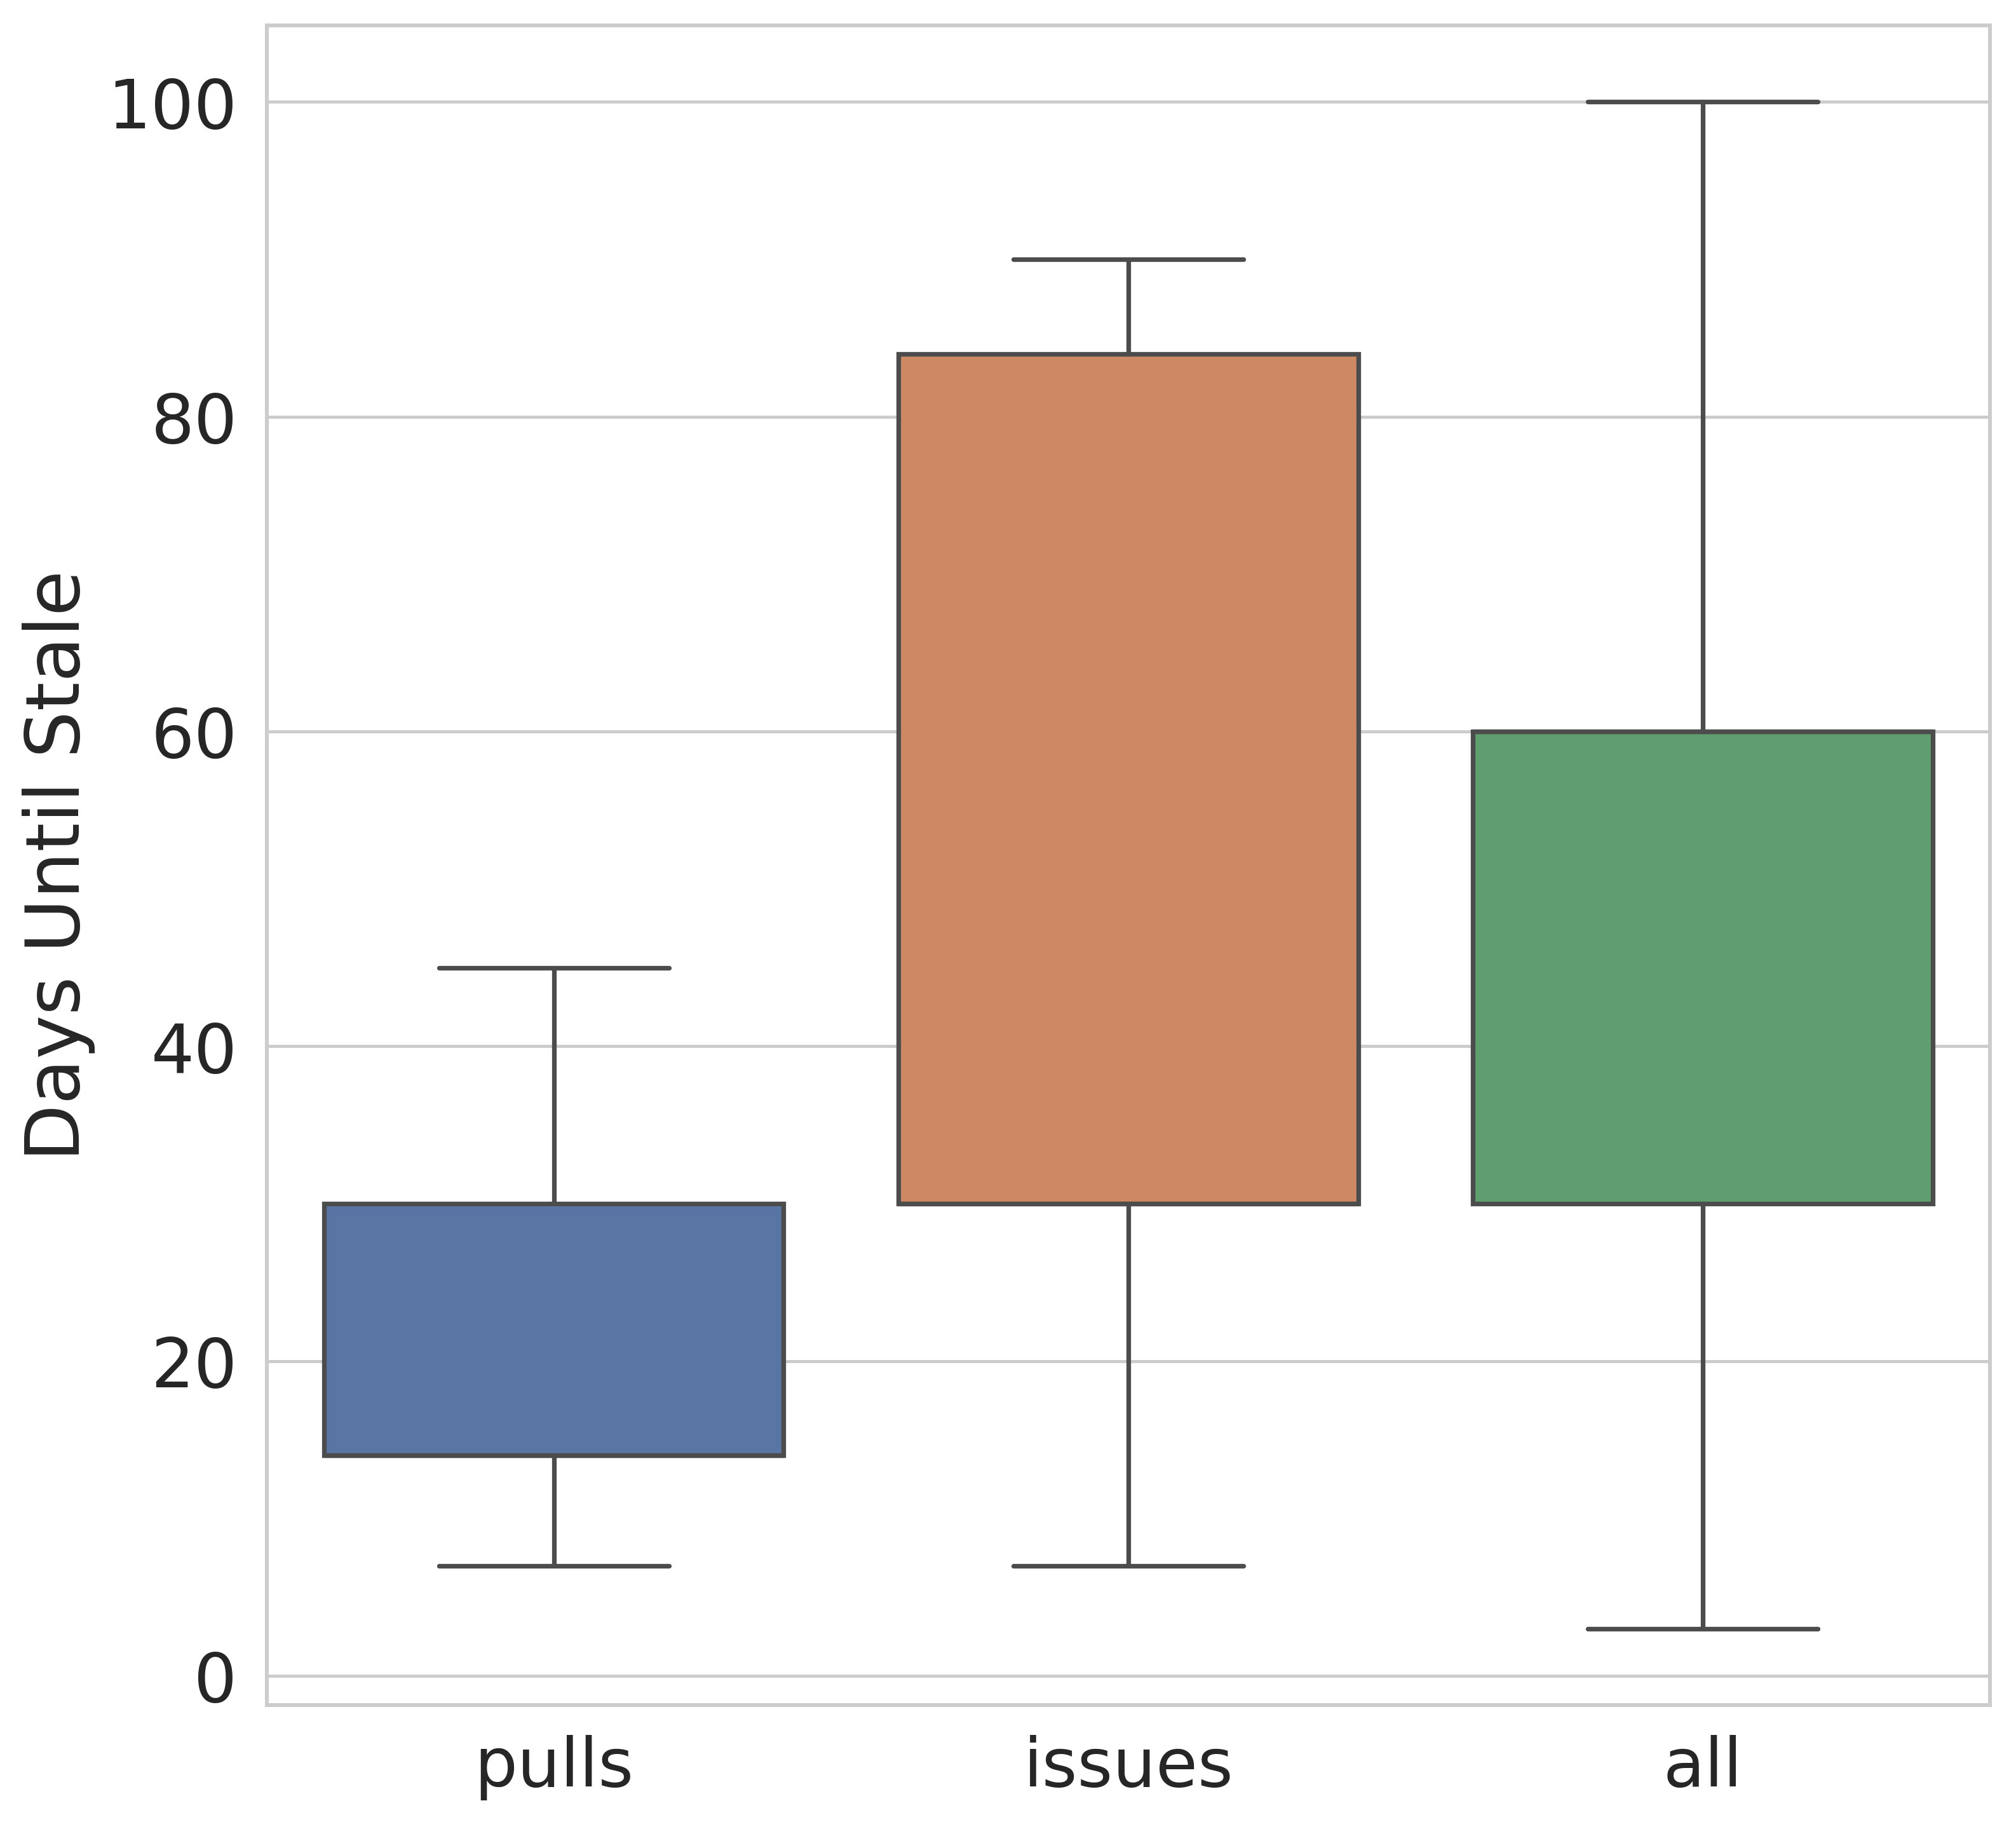

In [66]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
plt.subplots(figsize=(10, 10), dpi=350)
af = sns.boxplot(x=attr['conf'], y=attr['days_until_stale'], data=attr, showfliers=False)
af.set_xlabel("")
af.set_ylabel("Days Until Stale")
plt.savefig('boxplot_daysuntilstale.pdf', bbox_inches='tight')

###  Descriptive statistics by group - days until close

In [26]:
attr['days_until_close'].describe()

count     847
unique     26
top         7
freq      544
Name: days_until_close, dtype: int64

In [27]:
attr_true = attr[attr['days_until_close']!=False]

attr_true['days_until_close'] = attr_true['days_until_close'].apply(pd.to_numeric, errors='coerce')

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
attr_true = attr_true.sort_values(by=['conf'])

In [77]:
attr_true.groupby('conf')['days_until_close'].describe()

,count,mean,std,min,25%,50%,75%,max
conf,,,,,,,,
all,571.0,19.064799,158.154192,-1.0,7.0,7.0,7.0,3600.0
issues,157.0,20.885350,16.794370,-1.0,7.0,7.0,40.0,60.0
pulls,42.0,37.190476,167.534232,-1.0,7.0,7.0,14.0,1095.0


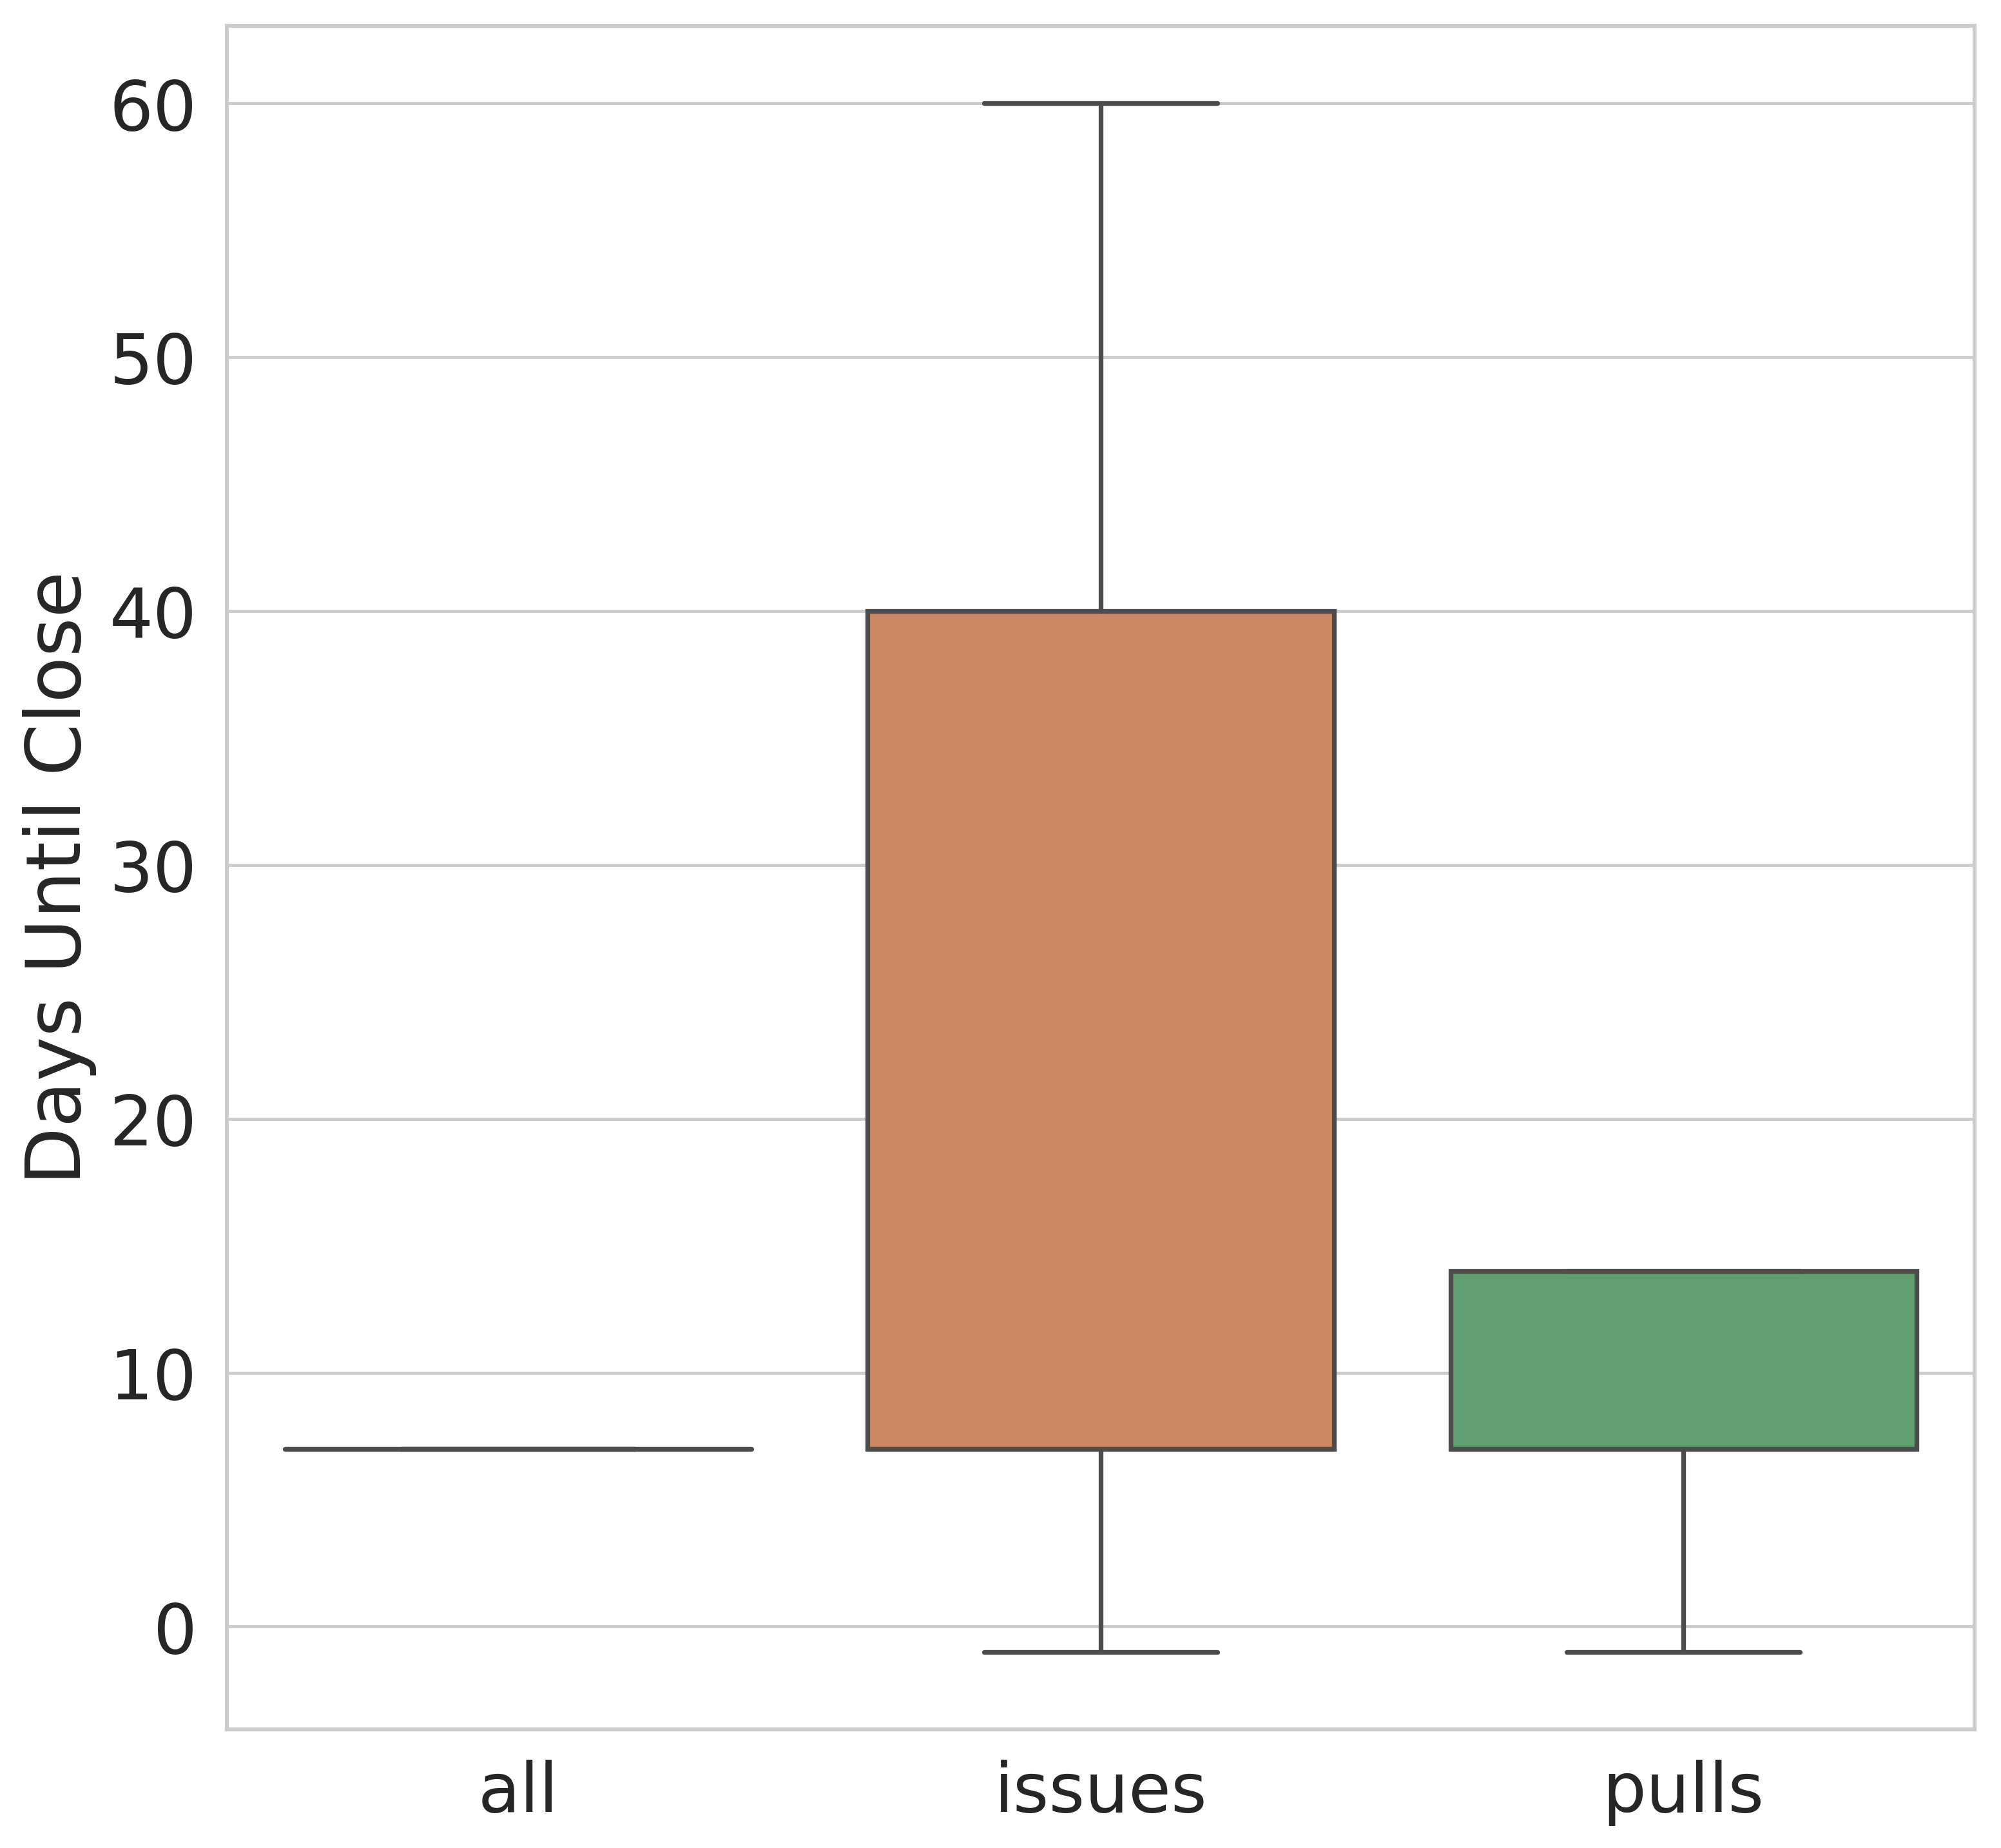

In [72]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
plt.subplots(figsize=(10, 10), dpi=350)
af = sns.boxplot(x=attr_true['conf'], y=attr_true['days_until_close'], data=attr_true, showfliers=False)
af.set_xlabel("")
af.set_ylabel("Days Until Close")
plt.savefig('boxplot_daysuntilclose.pdf', bbox_inches='tight')

### Descriptive statistics by group - stale label

In [30]:
attr['stale_label'].describe()

count       847
unique       45
top       stale
freq        351
Name: stale_label, dtype: object

In [31]:
attr['stale_label'] = attr['stale_label']\
.replace(['Status: Stale', 'Resolution/Stale','status: stale', 'Stale', 'Status] Stale', 'status/stale', 'goneStale', 'PR: stale', 'stale-issue', 'staled', 'lifecycle/stale', 'stalled', 'status/STALE', 'info: Stale', 'state: stale', 'stale?', 'S: Stale', 'status:stale'], 'stale')\
.replace(['abandoned', 'review-abandoned'], 'abandoned')\
.replace(['Wontfix', 'wontfix-stalebot'], 'wontfix')\
.replace(['Archived'], 'archived')\
.replace(['status:inactive', 'Inactive'], 'inactive')\
.replace(['no-activity'], 'no recent activity')\
.replace(['closing-soon-if-no-response', 'needs response from reporter'], 'needs response')\
.replace(['Pending Closure'], 'Pending')\
.replace(['s1:awaiting input', 'waiting-for-response-or-contribution'], 'waiting')\
.replace(['Unclear', 'needs more info'], 'need more info')

In [32]:
attr['stale_label'].unique()

array(['abandoned', 'stale', 'waiting', 'wontfix', 'inactive', 'Pending',
       'needs response', 'archived', 'Old', 'no recent activity',
       'no-recent-activity', 'standby', 'decaying', 'need more info',
       'unclear', 'rejected'], dtype=object)

### Plotting stale labels

In [33]:
df_2 = attr.groupby('stale_label').count()
df_2.reset_index(inplace=True)
df_2 = df_2.sort_values(by=['repo'])

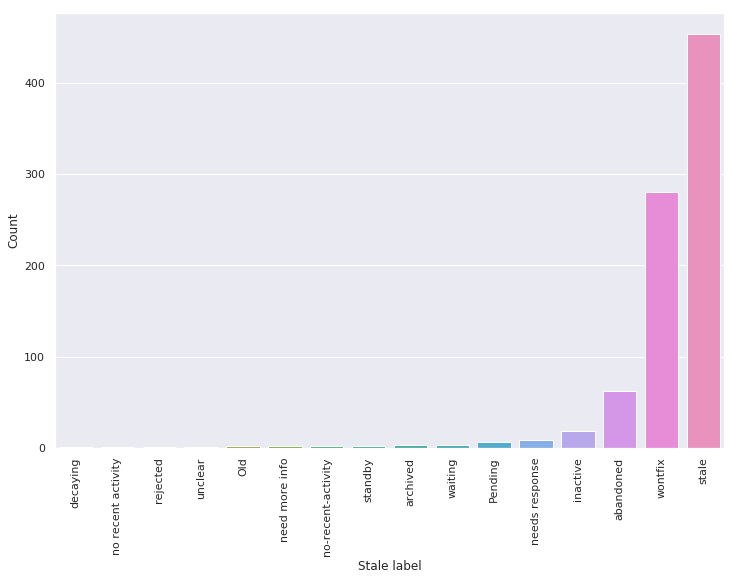

In [34]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
ax = sns.barplot(x='stale_label', y='repo', data=df_2);
ax.set(xlabel="Stale label", ylabel='Count')
for item in ax.get_xticklabels(): item.set_rotation(90)

### Plotting exempt labels

In [35]:
labels = exempt_labels[exempt_labels['repo'] != 'oppia/oppia']

In [37]:
labels['label'] = labels['label']\
.replace(['Bug', 'BUG', 'confirmed bug', 'critical bug', 'unconfirmed-bug', 'Bug confirmed', 'minor bug', 'confirmed-bug', 'bug-confirmed', 'Confirmed Bug', 'upstream-bug', 'type: bug', 'type: Bug', 'fixme/bug'], 'bug')\
.replace(['k: Feature', 'feature request', 'Feature', 'type: Feature', 'feature-request', 'kind/feature-request', 'Feature Request'], 'feature')\
.replace(['Status: Accepted', 'status: Accepted', 's: Accepted', 'Accepted', 'status: accepted'], 'accepted')\
.replace(['status/pinned', 'info: Pinned', 'Pinned'], 'pinned')\
.replace(['Pri] High', 'high-priority', 'priority/high', 'High Priority'], 'high priority')\
.replace(['module proposal'], 'proposal')\
.replace(['working on it', 'In Progress', 'in progress', 'Status: In progress', 'in-progress', 'WIP', 'wip'], 'work in progress')\
.replace(['beginner friendly', 'good-first-issue', 'nice-to-have', 'good first task', 'junior job', 'contributions-welcome', 'status: wip', 'good first patch', 'good first issue', 'Good First Issue', 'Good first issue', 'first-timers only', 'up-for-grabs', 'up for grabs'], 'newcomer')\
.replace(['nostale', 'no probot', 'Do not stale', 'no stalebot', 'StaleBot Ignore', 'not stale', 'never-stale', 'neverstale'], 'no stale')\
.replace(['docs or examples', 'docs'], 'documentation')\
.replace(['Status: Review Needed', 'needs-review', 'NEEDS REVIEW', 'awaiting review', 'PR: unreviewed'], 'needs review')\
.replace(['Technical Debt'], 'technical debt')\
.replace(['Idea', 'type: Idea', 'brainstorming/wild idea', 'plans', 'planned', 'suggestion'], 'idea')\
.replace(['Refactoring'], 'refactor')\
.replace(['help-wanted', 'Help Wanted', 'Help wanted'], 'help wanted')\
.replace(['release blocker', 'Status: Blocked', 'Blocked', 'Pri] BLOCKER', 'blocked', 'blocker', 'blocking-stable', 'Pri] Blocking'], 'blocked')\
.replace(['later', 'Status] Maybe Later', '[Status] Maybe Later', 'maybe-later', 'status: future'], 'maybe later')\
.replace(['triaged', 'S: Triaged'], 'triage')\
.replace(['type] bugfix'], 'bugfix')\
.replace(['category:security', 'Security'], 'security')\
.replace(['Status: On hold'], 'on hold')\
.replace(['Discussion', 'Needs Discussion', 't3:discussion', 'For Discussion', 'discussing'], 'discussion')\
.replace(['Greenkeeper'], 'greenkeeper')\
.replace(['Status] Keep Open', 'Keep'], 'keep')\
.replace(['released', 'waiting-on-release', 'waiting for release', 'type: Release', 'Release', 'v2 release', 'next_release', 'staged for next release'], 'release')\
.replace(['type: Enhancement', 'Enhancement', 'T: Enhancement', 't1:enhancement'], 'enhancement')\
.replace(['help/PR welcome', 'contributions welcome'], 'contribution welcome')\
.replace(['Status: Under Consideration', 'Up for consideration'], 'under consideration')\
.replace(['Do Not Merge'], 'do not merge')\
.replace(['roadmap-short-term', 'roadmap-medium-term', 'roadmap-long-term'], 'roadmap')\
.replace(['Under Review'], 'under review')\
.replace(['pending-reply', 'pending-publication'], 'pending')\
.replace(['distro-support', 'app-support', 'Device Support'], 'support')\
.replace(['issue: proposal', 'resource proposal'], 'proposal')

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
labels['label'].unique()

array(['needs review', 'bug', 'newcomer', 'pinned', 'accepted',
       'enhancement', 'todo', 'Epic', 'Resolution/Postponed', 'roadmap',
       'feature', 'discussion', 'help wanted', 'regression', 'v2',
       'gsoc-outreachy', 'has pr', 'investigating', 'work in progress',
       'high priority', 'pr', 'idea', 'security', 'backlog', 'no stale',
       'Merge After Thaw', 'blocked', 'confirmed', 'rfc', 'support',
       'greenkeeper', 'crash', 'lifecycle/frozen', 'under review',
       'under consideration', 'priority-crtical', 'BREAKING CHANGE',
       'New Component', 'Slow Burner', 'improvement',
       'lifecycle/preserve', 'proposal', 'bounty', 'android', 'hotfix',
       'do not merge', 'slow burner', 'Critical', 'browser', 'epic',
       'refactor', 'future', 'important', 'in_zendesk', 'META', 'admin',
       'contribution welcome', 'on hold', 'release', 'keep', 'starters',
       'ready', 'maybe later', 'Add Language', 'breaking change',
       'CNCF requirement', 'Dependency 

In [38]:
df_2 = labels.groupby('label').count()
df_2.reset_index(inplace=True)
df_2.sort_values(by=['repo'], inplace=True)

In [39]:
df_2

,label,owner,project_name,repo,only,conf
0,2,1,1,1,1,1
106,new iqm,1,1,1,1,1
104,needs milestone,1,1,1,1,1
102,needs decision,1,1,1,1,1
100,module:web,1,1,1,1,1
99,module:project-common,1,1,1,1,1
98,module:plugin,1,1,1,1,1
97,module:flink,1,1,1,1,1
96,module:collector,1,1,1,1,1
95,module:agent,1,1,1,1,1


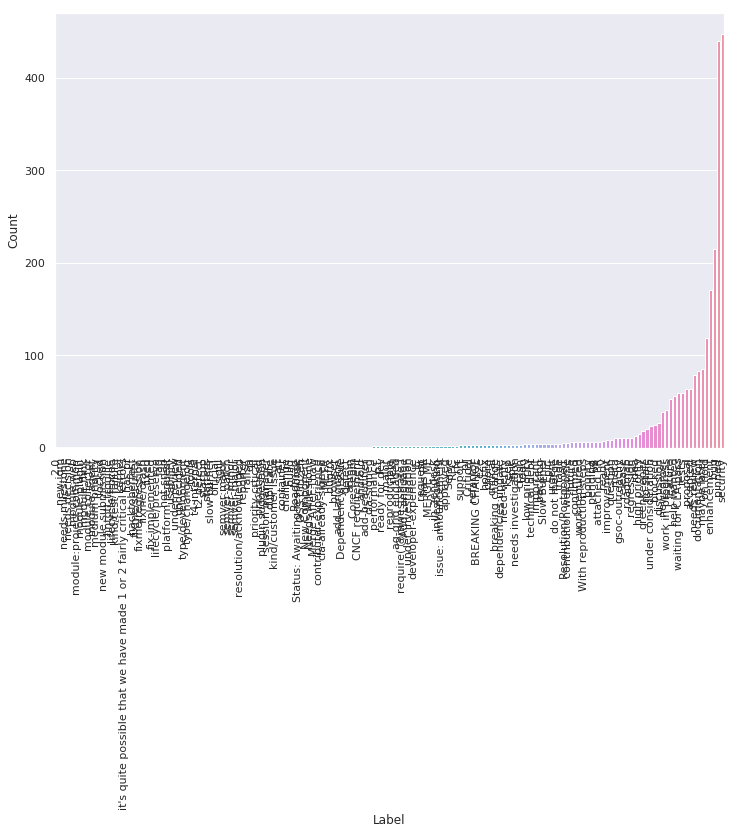

In [40]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
ax = sns.barplot(x='label', y='repo', data=df_2);
ax.set(xlabel="Label", ylabel='Count')
for item in ax.get_xticklabels(): item.set_rotation(90)

### Modification Analysis

In [43]:
df.groupby('repo').count()\
.reset_index() \
.sort_values(['owner'], ascending=False) 

,repo,project_name,change_type,in_main_branch,commit_hash,commit_msg,commit_author,committer,is_merge,commit_date,source_code,diff,num_added,num_removed,owner
640,saltstack/salt,722,722,722,722,722,722,722,722,722,722,722,722,722,722
693,storybooks/storybook,72,72,72,72,72,72,72,72,72,72,72,72,72,72
692,storybooks/react-storybook,72,72,72,72,72,72,72,72,72,72,72,72,72,72
454,kadirahq/react-storybook,72,72,72,72,72,72,72,72,72,72,72,72,72,72
588,pfnet/chainer,38,38,38,38,38,38,38,38,38,38,38,38,38,38
284,chainer/chainer,38,38,38,38,38,38,38,38,38,38,38,38,38,38
229,ashfurrow/Moya,31,31,31,31,31,31,31,31,31,31,31,31,31,31
89,Moya/Moya,31,31,31,31,31,31,31,31,31,31,31,31,31,31
24,CartoDB/cartodb,27,27,27,27,27,27,27,27,27,27,27,27,27,27
389,frappe/erpnext,24,24,24,24,24,24,24,24,24,24,24,24,24,24
